In [1]:
import matplotlib.pyplot as plt

import data_containers as dc
import traj_planner as tj

from importlib import reload 
reload(dc)
reload(tj)

<module 'traj_planner' from '/home/anovelli/repositories/drone_flightplans/traj_planner.py'>

In [8]:
site=dc.Site("./coords/site.json")
site.set_origin()

planner = tj.TrajectoryPlanner(site)

/home/anovelli/repositories/drone_flightplans/data_containers.py:131: UserWarning: No origin provided: assuming the barycenter of all telescopes as origin.
  warnings.warn("No origin provided: assuming the barycenter of all telescopes as origin.", UserWarning)


In [9]:
poi_enu = site.geodetic_to_enu(site.origin)

trajectory = planner.new_arc_trajectory_202412(
    nominal_poi = poi_enu, #poi with respect to which we compute the center of the arc
    nominal_az= 180,
    nominal_el= 47,
    nominal_srange= 500,
    # actual POI with respect to which we move
    poi = site.telescopes["class2"].enu,
    delta_el= 10,
    num_steps_el= 5,
)

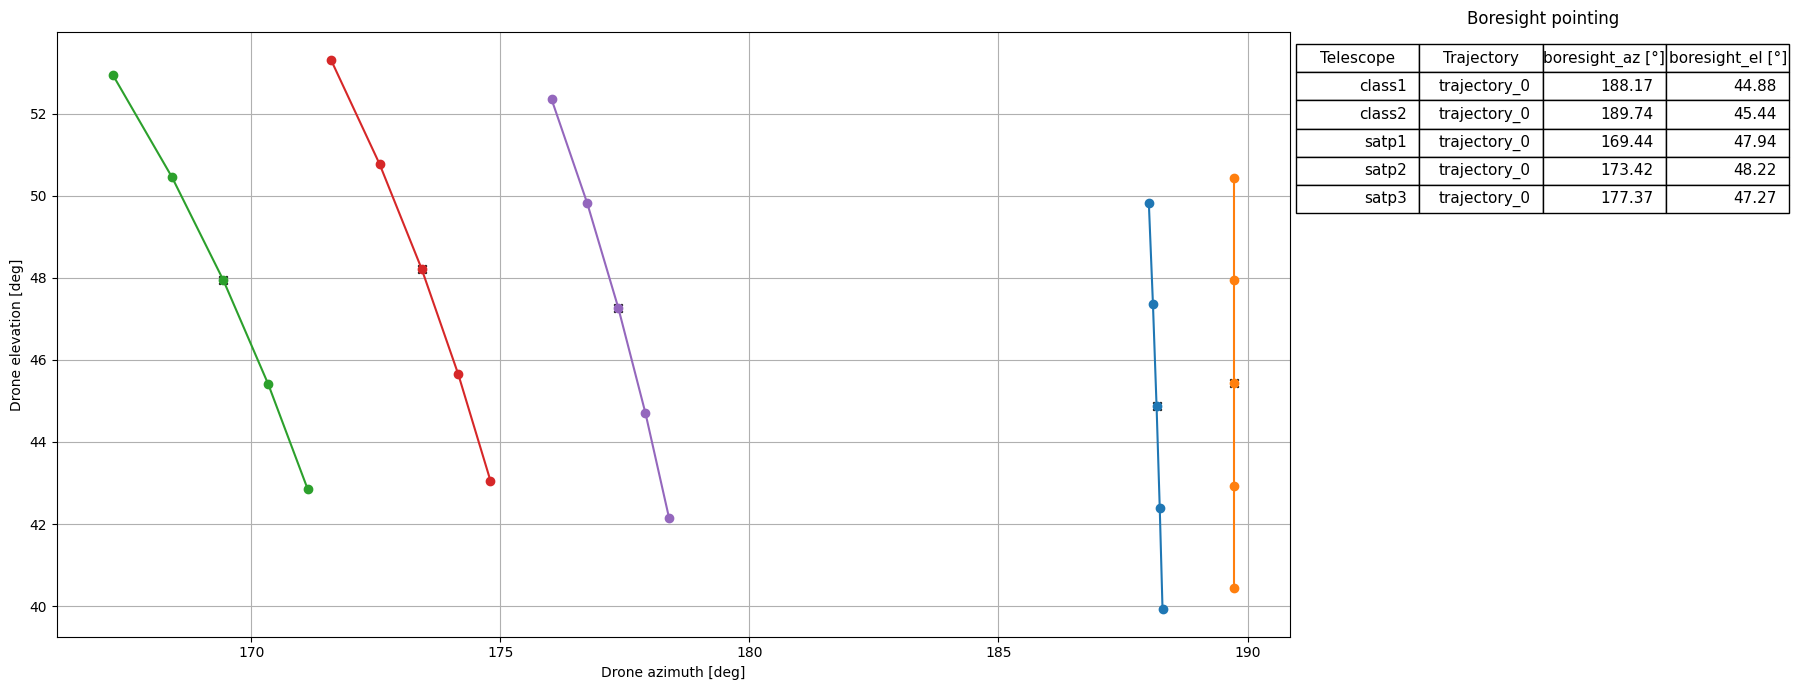

In [10]:
planner.plot_trajectories(trajectory, boresight_table=True)

In [13]:
import utils.qgc_utils as qgc
import trajectory_io as io

reload(qgc)
reload(io)

<module 'trajectory_io' from '/home/anovelli/repositories/drone_flightplans/trajectory_io.py'>

In [14]:
mission = io.export_mission_qgc(trajectory, 10, 1.5, 5, savepath="outputs/load_test.plan", safety_waypoints="south", fence=True)

In [15]:
mission = io.export_mission_litchi(trajectory, 10, 1.5, 5, savepath="outputs/load_test.csv", safety_waypoints="south")

In [16]:
mission = io.export_mission_mp(trajectory, 10, 1.5, 5, savepath="outputs/load_test.waypoints", safety_waypoints="south")